In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
test = pd.read_csv("./data/test.csv")

In [4]:
print("Training data size: " + str(train.shape))

Training data size: (42000, 785)


In [5]:
print("Testing data size: " + str(test.shape))

Testing data size: (28000, 784)


In [6]:
X = train.values[:, 1:]
y = train["label"].values

test_x = test.values

In [7]:
X = X/255.0
test_x = test_x/255.0

In [8]:
X = X.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [9]:
# label encoding
y = to_categorical(y)

print("label size :" + str(y.shape))

label size :(42000, 10)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

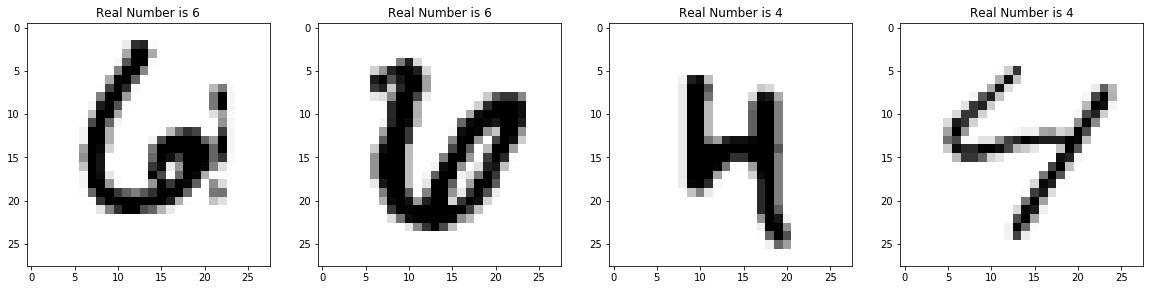

In [12]:
# data visualization
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = Y_train[i].argmax()
    ax.set(title='Real Number is %s' %digit)

In [13]:
# Normalization
mean = np.mean(X_train)

In [14]:
std = np.std(X_train)

In [15]:
def standardize(x):
    return (x-mean)/std

In [16]:
epochs = 45
batch_size = 64

In [17]:
nets = 15
model = [0] * 15

for j in range(nets):
    model[j] = Sequential()
    
    model[j].add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model[j].add(Conv2D(filters=32, kernel_size=(5,5), strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    
    model[j].add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(filters=32, kernel_size=(5,5), strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))
    
    model[j].add(Conv2D(filters=128, kernel_size=(4,4), activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))
    
    model[j].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])      







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [18]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1)

In [19]:
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
history = [0] * nets
for j in range(nets):
    history[j] = model[j].fit_generator(
        datagen.flow(X_train, Y_train, batch_size=batch_size),
        epochs = epochs,
        steps_per_epoch = X_train.shape[0]//64,
        validation_data = (X_test, Y_test),
        callbacks = [annealer])
    print('CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3: .5f}'.format(
        j+1, epochs, max(history[j].history['acc']), max(history[j].history['val_acc'])))
    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/45
525/525 [==============================] - 86s 164ms/step - loss: 0.5763 - acc: 0.8225 - val_loss: 0.0848 - val_acc: 0.9738
Epoch 2/45
525/525 [==============================] - 74s 141ms/step - loss: 0.1561 - acc: 0.9524 - val_loss: 0.0532 - val_acc: 0.9836
Epoch 3/45
525/525 [==============================] - 73s 140ms/step - loss: 0.1240 - acc: 0.9634 - val_loss: 0.0404 - val_acc: 0.9875
Epoch 4/45
525/525 [==============================] - 75s 143ms/step - loss: 0.0968 - acc: 0.9710 - val_loss: 0.0468 - val_acc: 0.9855
Epoch 5/45
525/525 [==============================] - 1289s 2s/step - loss: 0.0866 - acc: 0.9739 - val_loss: 0.0331 - val_acc: 0.9896
Epoch 6/45
525/525 [==============================] - 1535s 3s/step - loss: 0.0761 - acc: 0.9775 - val_loss: 0.0273 - val_acc: 0.9911
Epoch 7/45
525/525 [==============================] - 77s 147ms/step - loss: 0.0684 - acc: 0.9789 

525/525 [==============================] - 68s 129ms/step - loss: 0.0451 - acc: 0.9868 - val_loss: 0.0177 - val_acc: 0.9949
Epoch 14/45
525/525 [==============================] - 71s 136ms/step - loss: 0.0471 - acc: 0.9863 - val_loss: 0.0214 - val_acc: 0.9935
Epoch 15/45
525/525 [==============================] - 68s 130ms/step - loss: 0.0430 - acc: 0.9874 - val_loss: 0.0209 - val_acc: 0.9938
Epoch 16/45
525/525 [==============================] - 68s 130ms/step - loss: 0.0425 - acc: 0.9876 - val_loss: 0.0194 - val_acc: 0.9944
Epoch 17/45
525/525 [==============================] - 68s 130ms/step - loss: 0.0401 - acc: 0.9880 - val_loss: 0.0183 - val_acc: 0.9949
Epoch 18/45
525/525 [==============================] - 68s 130ms/step - loss: 0.0369 - acc: 0.9890 - val_loss: 0.0160 - val_acc: 0.9945
Epoch 19/45
525/525 [==============================] - 68s 130ms/step - loss: 0.0338 - acc: 0.9896 - val_loss: 0.0149 - val_acc: 0.9949
Epoch 20/45
525/525 [==============================] - 69s 1

Epoch 28/45
525/525 [==============================] - 69s 132ms/step - loss: 0.0255 - acc: 0.9925 - val_loss: 0.0140 - val_acc: 0.9962
Epoch 29/45
525/525 [==============================] - 69s 131ms/step - loss: 0.0249 - acc: 0.9928 - val_loss: 0.0164 - val_acc: 0.9949
Epoch 30/45
525/525 [==============================] - 69s 131ms/step - loss: 0.0239 - acc: 0.9927 - val_loss: 0.0165 - val_acc: 0.9948
Epoch 31/45
525/525 [==============================] - 69s 131ms/step - loss: 0.0239 - acc: 0.9926 - val_loss: 0.0164 - val_acc: 0.9950
Epoch 32/45
525/525 [==============================] - 69s 131ms/step - loss: 0.0227 - acc: 0.9927 - val_loss: 0.0160 - val_acc: 0.9954
Epoch 33/45
525/525 [==============================] - 69s 131ms/step - loss: 0.0225 - acc: 0.9937 - val_loss: 0.0175 - val_acc: 0.9952
Epoch 34/45
525/525 [==============================] - 69s 132ms/step - loss: 0.0223 - acc: 0.9929 - val_loss: 0.0146 - val_acc: 0.9954
Epoch 35/45
525/525 [===========================

Epoch 43/45
525/525 [==============================] - 70s 133ms/step - loss: 0.0186 - acc: 0.9944 - val_loss: 0.0129 - val_acc: 0.9961
Epoch 44/45
525/525 [==============================] - 69s 132ms/step - loss: 0.0166 - acc: 0.9956 - val_loss: 0.0115 - val_acc: 0.9965
Epoch 45/45
525/525 [==============================] - 71s 134ms/step - loss: 0.0171 - acc: 0.9948 - val_loss: 0.0115 - val_acc: 0.9964
CNN 4: Epochs=45, Train accuracy=0.99562, Validation accuracy= 0.99667
Epoch 1/45
525/525 [==============================] - 82s 157ms/step - loss: 0.5586 - acc: 0.8266 - val_loss: 0.0963 - val_acc: 0.9711
Epoch 2/45
525/525 [==============================] - 72s 137ms/step - loss: 0.1568 - acc: 0.9533 - val_loss: 0.0710 - val_acc: 0.9794
Epoch 3/45
525/525 [==============================] - 70s 133ms/step - loss: 0.1166 - acc: 0.9648 - val_loss: 0.0330 - val_acc: 0.9901
Epoch 4/45
525/525 [==============================] - 68s 130ms/step - loss: 0.0967 - acc: 0.9708 - val_loss: 0.0302

525/525 [==============================] - 1218s 2s/step - loss: 0.0547 - acc: 0.9842 - val_loss: 0.0192 - val_acc: 0.9931
Epoch 13/45
525/525 [==============================] - 1217s 2s/step - loss: 0.0494 - acc: 0.9855 - val_loss: 0.0208 - val_acc: 0.9930
Epoch 14/45
525/525 [==============================] - 1216s 2s/step - loss: 0.0481 - acc: 0.9858 - val_loss: 0.0196 - val_acc: 0.9938
Epoch 15/45
525/525 [==============================] - 1217s 2s/step - loss: 0.0439 - acc: 0.9869 - val_loss: 0.0170 - val_acc: 0.9957
Epoch 16/45
525/525 [==============================] - 718s 1s/step - loss: 0.0414 - acc: 0.9873 - val_loss: 0.0175 - val_acc: 0.9943
Epoch 17/45
525/525 [==============================] - 70s 133ms/step - loss: 0.0406 - acc: 0.9881 - val_loss: 0.0230 - val_acc: 0.9937
Epoch 18/45
525/525 [==============================] - 71s 135ms/step - loss: 0.0391 - acc: 0.9881 - val_loss: 0.0191 - val_acc: 0.9948
Epoch 19/45
525/525 [==============================] - 71s 134ms/s

525/525 [==============================] - 80s 153ms/step - loss: 0.0240 - acc: 0.9928 - val_loss: 0.0137 - val_acc: 0.9964
Epoch 28/45
525/525 [==============================] - 84s 159ms/step - loss: 0.0262 - acc: 0.9918 - val_loss: 0.0137 - val_acc: 0.9961
Epoch 29/45
525/525 [==============================] - 84s 161ms/step - loss: 0.0231 - acc: 0.9930 - val_loss: 0.0118 - val_acc: 0.9970
Epoch 30/45
525/525 [==============================] - 73s 139ms/step - loss: 0.0255 - acc: 0.9928 - val_loss: 0.0130 - val_acc: 0.9960
Epoch 31/45
525/525 [==============================] - 79s 150ms/step - loss: 0.0211 - acc: 0.9938 - val_loss: 0.0178 - val_acc: 0.9949
Epoch 32/45
525/525 [==============================] - 76s 144ms/step - loss: 0.0227 - acc: 0.9930 - val_loss: 0.0125 - val_acc: 0.9970
Epoch 33/45
525/525 [==============================] - 73s 140ms/step - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0123 - val_acc: 0.9967
Epoch 34/45
525/525 [==============================] - 77s 1

Epoch 42/45
525/525 [==============================] - 76s 145ms/step - loss: 0.0187 - acc: 0.9944 - val_loss: 0.0154 - val_acc: 0.9957
Epoch 43/45
525/525 [==============================] - 75s 142ms/step - loss: 0.0189 - acc: 0.9949 - val_loss: 0.0151 - val_acc: 0.9963
Epoch 44/45
525/525 [==============================] - 75s 143ms/step - loss: 0.0183 - acc: 0.9947 - val_loss: 0.0148 - val_acc: 0.9965
Epoch 45/45
525/525 [==============================] - 76s 146ms/step - loss: 0.0169 - acc: 0.9953 - val_loss: 0.0150 - val_acc: 0.9961
CNN 8: Epochs=45, Train accuracy=0.99527, Validation accuracy= 0.99667
Epoch 1/45
525/525 [==============================] - 85s 162ms/step - loss: 0.5695 - acc: 0.8239 - val_loss: 0.0666 - val_acc: 0.9792
Epoch 2/45
525/525 [==============================] - 72s 137ms/step - loss: 0.1523 - acc: 0.9558 - val_loss: 0.0761 - val_acc: 0.9776
Epoch 3/45
525/525 [==============================] - 74s 140ms/step - loss: 0.1163 - acc: 0.9647 - val_loss: 0.043

525/525 [==============================] - 72s 137ms/step - loss: 0.0564 - acc: 0.9834 - val_loss: 0.0224 - val_acc: 0.9926
Epoch 12/45
525/525 [==============================] - 74s 141ms/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0235 - val_acc: 0.9929
Epoch 13/45
525/525 [==============================] - 73s 139ms/step - loss: 0.0498 - acc: 0.9854 - val_loss: 0.0220 - val_acc: 0.9932
Epoch 14/45
525/525 [==============================] - 76s 145ms/step - loss: 0.0475 - acc: 0.9857 - val_loss: 0.0205 - val_acc: 0.9943
Epoch 15/45
525/525 [==============================] - 75s 142ms/step - loss: 0.0430 - acc: 0.9874 - val_loss: 0.0202 - val_acc: 0.9932
Epoch 16/45
525/525 [==============================] - 78s 148ms/step - loss: 0.0407 - acc: 0.9871 - val_loss: 0.0180 - val_acc: 0.9940
Epoch 17/45
525/525 [==============================] - 76s 146ms/step - loss: 0.0399 - acc: 0.9878 - val_loss: 0.0175 - val_acc: 0.9942
Epoch 18/45
525/525 [==============================] - 73s 1

Epoch 26/45
525/525 [==============================] - 74s 142ms/step - loss: 0.0275 - acc: 0.9915 - val_loss: 0.0174 - val_acc: 0.9943
Epoch 27/45
525/525 [==============================] - 72s 137ms/step - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0165 - val_acc: 0.9957
Epoch 28/45
525/525 [==============================] - 72s 138ms/step - loss: 0.0231 - acc: 0.9932 - val_loss: 0.0180 - val_acc: 0.9952
Epoch 29/45
525/525 [==============================] - 72s 137ms/step - loss: 0.0247 - acc: 0.9928 - val_loss: 0.0147 - val_acc: 0.9957
Epoch 30/45
525/525 [==============================] - 72s 137ms/step - loss: 0.0231 - acc: 0.9930 - val_loss: 0.0147 - val_acc: 0.9955
Epoch 31/45
525/525 [==============================] - 74s 140ms/step - loss: 0.0229 - acc: 0.9929 - val_loss: 0.0145 - val_acc: 0.9961
Epoch 32/45
525/525 [==============================] - 73s 139ms/step - loss: 0.0221 - acc: 0.9934 - val_loss: 0.0137 - val_acc: 0.9964
Epoch 33/45
525/525 [===========================

Epoch 41/45
525/525 [==============================] - 72s 137ms/step - loss: 0.0190 - acc: 0.9939 - val_loss: 0.0133 - val_acc: 0.9964
Epoch 42/45
525/525 [==============================] - 86s 164ms/step - loss: 0.0184 - acc: 0.9947 - val_loss: 0.0130 - val_acc: 0.9961
Epoch 43/45
525/525 [==============================] - 89s 170ms/step - loss: 0.0185 - acc: 0.9940 - val_loss: 0.0123 - val_acc: 0.9965
Epoch 44/45
525/525 [==============================] - 89s 170ms/step - loss: 0.0171 - acc: 0.9946 - val_loss: 0.0138 - val_acc: 0.9963
Epoch 45/45
525/525 [==============================] - 79s 150ms/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.0119 - val_acc: 0.9964
CNN 12: Epochs=45, Train accuracy=0.99509, Validation accuracy= 0.99667
Epoch 1/45
525/525 [==============================] - 102s 194ms/step - loss: 0.5707 - acc: 0.8215 - val_loss: 0.0733 - val_acc: 0.9788
Epoch 2/45
525/525 [==============================] - 87s 165ms/step - loss: 0.1608 - acc: 0.9501 - val_loss: 0.

525/525 [==============================] - 1218s 2s/step - loss: 0.0588 - acc: 0.9821 - val_loss: 0.0253 - val_acc: 0.9919
Epoch 11/45
525/525 [==============================] - 1218s 2s/step - loss: 0.0554 - acc: 0.9845 - val_loss: 0.0196 - val_acc: 0.9938
Epoch 12/45
525/525 [==============================] - 1476s 3s/step - loss: 0.0503 - acc: 0.9852 - val_loss: 0.0189 - val_acc: 0.9938
Epoch 13/45
525/525 [==============================] - 1218s 2s/step - loss: 0.0509 - acc: 0.9851 - val_loss: 0.0214 - val_acc: 0.9930
Epoch 14/45
525/525 [==============================] - 1219s 2s/step - loss: 0.0504 - acc: 0.9854 - val_loss: 0.0350 - val_acc: 0.9895
Epoch 15/45
525/525 [==============================] - 526s 1s/step - loss: 0.0439 - acc: 0.9871 - val_loss: 0.0183 - val_acc: 0.9943
Epoch 16/45
525/525 [==============================] - 70s 133ms/step - loss: 0.0414 - acc: 0.9879 - val_loss: 0.0169 - val_acc: 0.9946
Epoch 17/45
525/525 [==============================] - 70s 134ms/st

525/525 [==============================] - 71s 136ms/step - loss: 0.0273 - acc: 0.9914 - val_loss: 0.0133 - val_acc: 0.9956
Epoch 26/45
525/525 [==============================] - 71s 135ms/step - loss: 0.0272 - acc: 0.9917 - val_loss: 0.0130 - val_acc: 0.9963
Epoch 27/45
525/525 [==============================] - 72s 137ms/step - loss: 0.0259 - acc: 0.9926 - val_loss: 0.0131 - val_acc: 0.9965
Epoch 28/45
525/525 [==============================] - 71s 135ms/step - loss: 0.0264 - acc: 0.9921 - val_loss: 0.0126 - val_acc: 0.9970
Epoch 29/45
525/525 [==============================] - 71s 135ms/step - loss: 0.0254 - acc: 0.9929 - val_loss: 0.0116 - val_acc: 0.9967
Epoch 30/45
525/525 [==============================] - 71s 136ms/step - loss: 0.0220 - acc: 0.9929 - val_loss: 0.0133 - val_acc: 0.9962
Epoch 31/45
525/525 [==============================] - 74s 142ms/step - loss: 0.0244 - acc: 0.9926 - val_loss: 0.0123 - val_acc: 0.9963
Epoch 32/45
525/525 [==============================] - 73s 1

In [20]:
results = np.zeros((test_x.shape[0], 10))
for j in range(nets):
    results = results + model[j].predict(test_x)
results = np.argmax(results, axis=1)
results = pd.Series(results, name='Label')
submission = pd.concat([pd.Series(range(1, 28001), name='ImageID'), results], axis=1)
submission.to_csv('submission_mnist_ensemble1.csv', index=False)

In [20]:
train_gen = datagen.flow(X_train, Y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, Y_test, batch_size=batch_size)

In [ ]:
# Model Training
history = model.fit_generator(train_gen, 
                epochs=epochs, 
                steps_per_epoch=X_train.shape[0]//batch_size,
                validation_data=test_gen,
                validation_steps=X_test.shape[0]//batch_size)

In [ ]:
model.save("./models/model_keras2.h5")

In [ ]:
pred = model.predict_classes(test_x, verbose=1)

In [ ]:
sub = pd.read_csv('./data/sample_submission.csv')
sub['Label'] = pred
sub.to_csv("./results/CNN_keras_sub4.csv", index=False)
sub.head(5)

In [ ]:
res = pd.read_csv('./result.csv')

In [ ]:
res.head(5)

In [ ]:
print("sub shape is: " + str(sub.shape))

In [ ]:
print('res shape is: ' + str(res.shape))